<a href="https://colab.research.google.com/github/entanglement-nak/portfolio-nak/blob/main/%E3%83%9D%E3%83%BC%E3%83%88%E3%83%95%E3%82%A9%E3%83%AA%E3%82%AA%E3%80%80CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# データパス
train_file_path = r"/content/drive/MyDrive/Wafer/Wafer_TRAIN.xlsx"

test_file_path = r"/content/drive/MyDrive/Wafer/Wafer_TEST.xlsx"

In [4]:
# 訓練データとテストデータの読み込み
train_data = pd.read_excel(train_file_path)
test_data = pd.read_excel(test_file_path)

In [7]:
# データの前処理
combined_data = pd.concat([train_data, test_data])
labels = combined_data.iloc[:, 0]
features = combined_data.iloc[:, 1:]
features = features.apply(pd.to_numeric, errors='coerce').fillna(0)

In [8]:
# 特徴量の名前を文字列に変換
features.columns = features.columns.astype(str)

# 以降の処理は同じです
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
# ...（以降のコードは変更なし）


In [9]:
# 特徴量の正規化
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

In [10]:
# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.3, random_state=42)

In [11]:
# 1次元CNNモデルの構築
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# モデルのコンパイル
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# データの形状調整
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train_encoded = (y_train + 1) / 2
y_test_encoded = (y_test + 1) / 2

In [14]:
# モデルの訓練
history = model.fit(X_train_reshaped, y_train_encoded, epochs=10, validation_data=(X_test_reshaped, y_test_encoded))

Epoch 1/10
157/157 [==============================] - 5s 23ms/step - loss: 0.1043 - accuracy: 0.9645 - val_loss: 0.0249 - val_accuracy: 0.9944
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0178 - val_accuracy: 0.9926
Epoch 3/10
157/157 [==============================] - 5s 32ms/step - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0132 - val_accuracy: 0.9972
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.0159 - accuracy: 0.9974 - val_loss: 0.0132 - val_accuracy: 0.9986
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.0142 - val_accuracy: 0.9991
Epoch 6/10
157/157 [==============================] - 3s 22ms/step - loss: 0.0095 - accuracy: 0.9986 - val_loss: 0.0102 - val_accuracy: 0.9991
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.0087 - accuracy: 0.9986 - val_loss: 0.0120 - val_accuracy: 0.9986

In [15]:
# テストデータでの評価
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int).flatten()

68/68 [==============================] - 1s 7ms/step


In [16]:
# 評価指標の計算
accuracy = accuracy_score(y_test_encoded, y_pred)
f1_macro = f1_score(y_test_encoded, y_pred, average='macro')
f1_weighted = f1_score(y_test_encoded, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test_encoded, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Macro F1 Score: {f1_macro}')
print(f'Weighted F1 Score: {f1_weighted}')
print(f'MCC: {mcc}')

Accuracy: 0.9995346672871103
Macro F1 Score: 0.9988033195214838
Weighted F1 Score: 0.9995351026131613
MCC: 0.9976094976183556


過学習していないかチェックを行う。

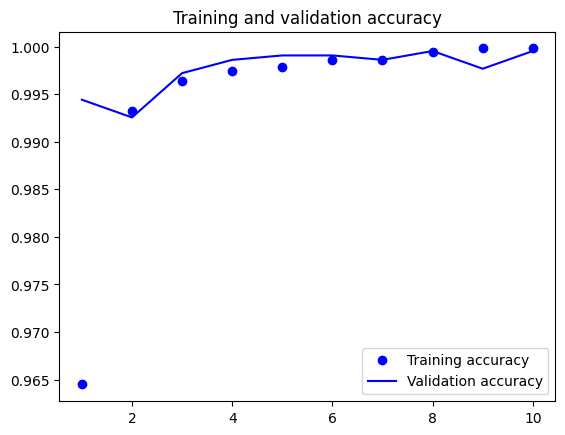

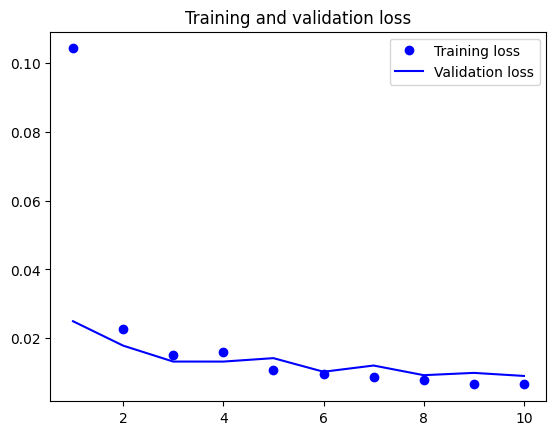

In [17]:
import matplotlib.pyplot as plt

# 訓練中の精度と損失の履歴を取得
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 訓練とテストの精度をプロット
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# 訓練とテストの損失をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()